In [2]:
import cv2
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
images = convert_from_path('bb.pdf')

In [15]:
num=1
for page in range(28,29):
    image=images[page]
    arr=np.asarray(image)
    arr=arr[:,300:1400,0]

    lis=[]
    point=0
    for i in range(2000):
        x=(arr[390+i:400+i,100:150]*-1)+255
        x=x.sum()
        if x!=0 :
            if point!=390+i-1:
                lis.append(390+i)
            point=390+i
        
    for x in range(len(lis)-1):
        if lis[x+1]-lis[x]<80:
            pass
        else:
            im=10    
            a_arr=(arr[lis[x]:lis[x+1],:]*-1)+255
            a=a_arr.sum()
            b_arr=(arr[lis[x]-im:lis[x+1],:]*-1)+255
            b=b_arr.sum()
            while (b>a):
                a=b
                im+=5
                b_arr=(arr[lis[-1]-im:lis[-1],:]*-1)+255
                b=b_arr.sum()
            question=arr[lis[x]-im:lis[x+1],:]
            im = Image.fromarray(question)
            im.save("AMC_"+str(page)+"_"+str(num)+".jpeg")
            num+=1
    i=30    
    c_arr=(arr[lis[-1]:lis[-1]+50,:]*-1)+255
    c=c_arr.sum()
    d_arr=(arr[lis[-1]:lis[-1]+50+i,:]*-1)+255
    d=d_arr.sum()
    while (d>c):
        c=d
        i+=30
        d_arr=(arr[lis[-1]:lis[-1]+50+i,:]*-1)+255
        d=d_arr.sum()
    im = Image.fromarray(arr[lis[-1]:lis[-1]+50+i,:])
    im.save("AMC_"+str(page)+"_"+str(num)+".jpeg")
    num=1

In [15]:
def sqbox(array,pos,size,thickness):
    arra=array.copy()
    k=arra[pos[1]-size+thickness:pos[1]+size+1-thickness,pos[0]-size+thickness:pos[0]+size+1-thickness].copy()
    arra[pos[1]-size:pos[1]+size+1,pos[0]-size:pos[0]+size+1]=0
    arra[pos[1]-size+thickness:pos[1]+size+1-thickness,pos[0]-size+thickness:pos[0]+size+1-thickness]=k
    return arra

In [36]:
x=sqbox(arr,(125,720),25,10)

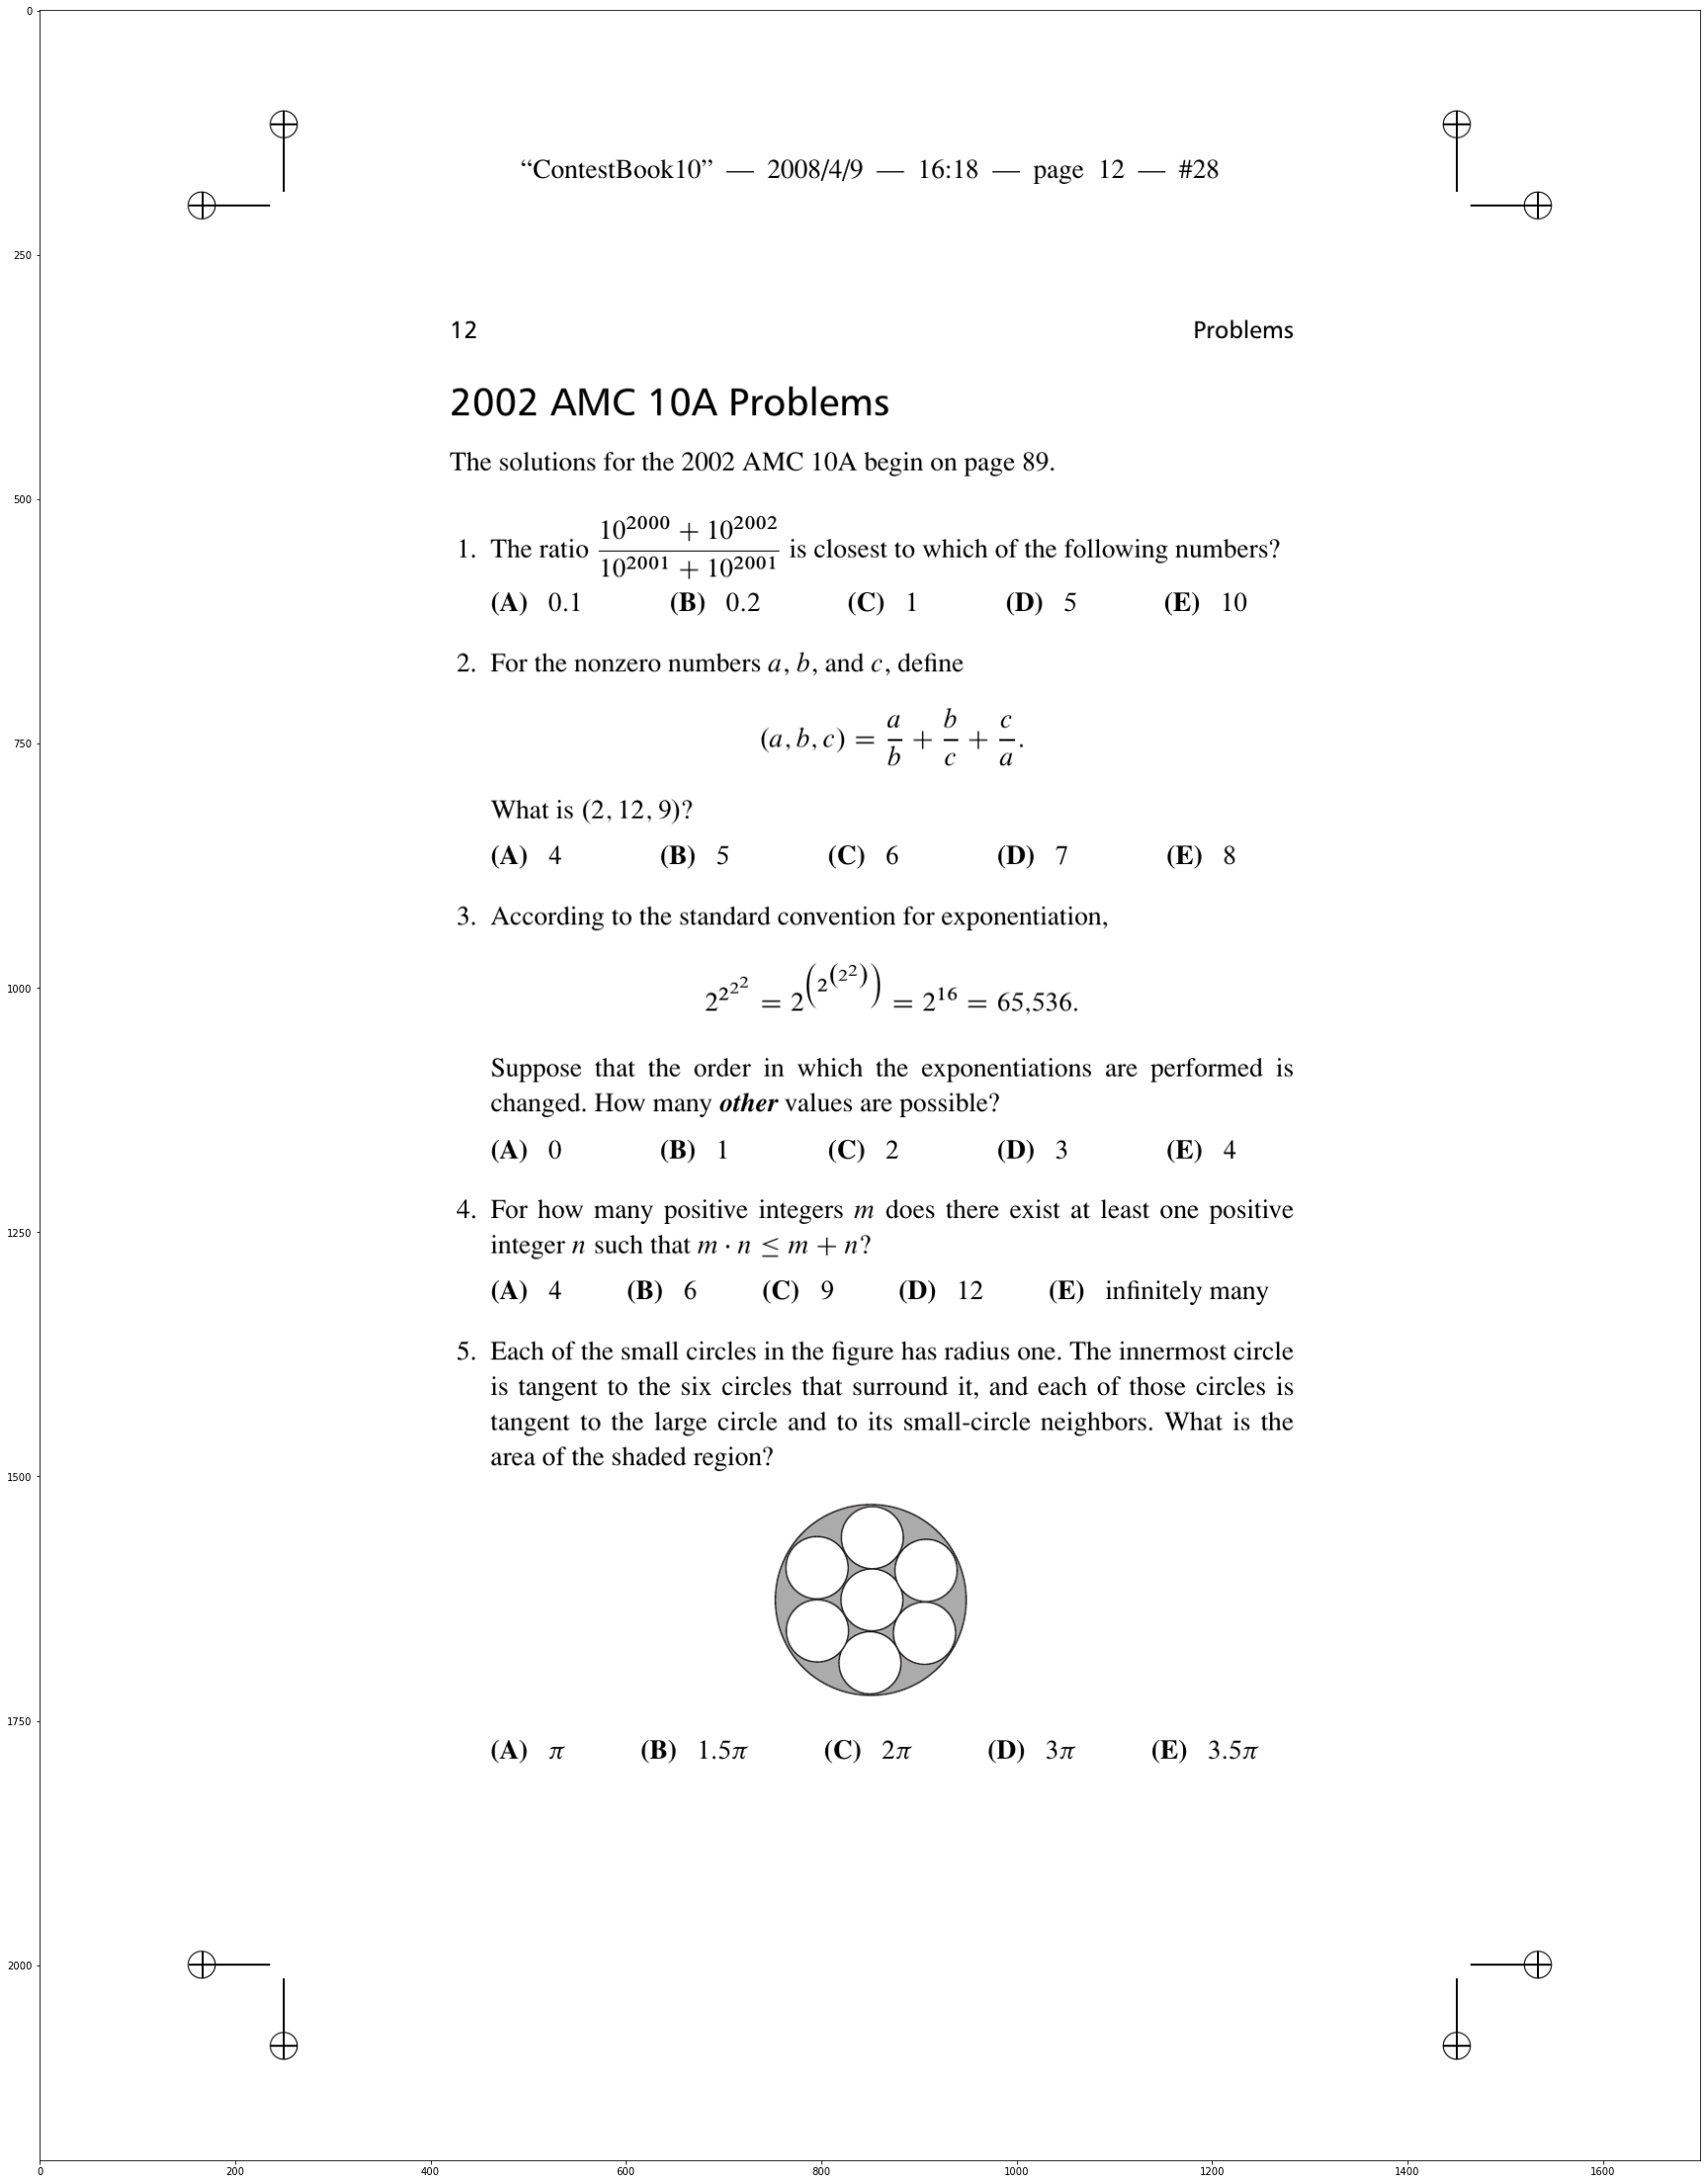

In [6]:
x=Image.open('AMC_28_1.jpeg')
plt.figure(figsize=(40,40))
plt.imshow(images[28],cmap='gray')